<a href="https://colab.research.google.com/github/jiayizhang19/Deep_Learning/blob/main/Decision_Tree_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS401 Assignment 2 - Part 1: Decision Tree Implementation on Wine Quality**


# Task 1: Understanding the data

## Task 1a: Description of Dataset
The dataset used here is wine quality data from UCI, including both red and white wine. It has 6497 samples in total, 11 features and 1 quality score. Feature and target are both numerical attributes.  
- Data Source: https://archive.ics.uci.edu/dataset/186/wine+quality
- 11 Features: fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol
- 1 Target: quality

## Task 1b: Justification of Task
- Classification Task:
  - Predict wine quality based on 11 features.
  - The original quality is a numerical score ranging from 0 to 9, while it will be treated as categorical data in three classes:
    - Bad: 0-4
    - Good: 5-6
    - Excellent: 7-9
- Why Decision Tree:
  - It provides an easy and clear way for winemakers to predict which class a wine belongs to, given a combination of multiple chemical properties.
  - It helps identify which chemical properties most influence wine quality.
  - The features in the raw dataset are numerical, and the quality score can be converted into categorical variable, making decision tree a suitable choice.



In [1]:
!pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from ucimlrepo import fetch_ucirepo

In [56]:
# ================================================================ #
# ========================= Data Loading ========================= #
# ================================================================ #
# fetch dataset and load data as pandas dataframe
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets

In [58]:
# ================================================================ #
# ============= Data preprocessing and preparation =============== #
# ================================================================ #
# Convert dataframes to series
if isinstance(y, pd.DataFrame) and len(y.columns)==1:
  y_series = y.iloc[:,0]

# Change numeric values into categorical target
scores = [0, 4, 6, 9]
labels = ['Bad (0-4)', 'Good (5-6)', 'Excellent (7-9)']
y_cat = pd.cut(y_series, bins = scores, labels = labels, include_lowest = True, ordered=True)

## Task 1c: Visualization of the Data

In [69]:
# ================================================================ #
# ==================== Summary of Dataset ======================== #
# ================================================================ #
print('========================= Shape of Dataset =========================')
print(f'Shape of features X is {X.shape}.')
print(f'Shape of target y is {y.shape}.')
print('\n======================== Columns of Dataset ======================')
print(f'Feature Columns: {X.columns.to_list()}')
print(f'Target Column: {y_cat.name}')
print('\n======================= Quality Score =============================')
print(f"Quality score range:  from {y_series.min()} to {y_series.max()}")
print('\n================ Quality Distribution of Dataset ==================')
print( y_cat.value_counts())
print('\n========== Feature Correlations with Quality of Dataset ==========')
correlations = X.corrwith(y_series).sort_values(ascending=False)
print(correlations.round(2))

========================= Shape of Dataset =========================
Shape of features X is (6497, 11).
Shape of target y is (6497, 1).

======================== Columns of Dataset ======================
Feature Columns: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Target Column: quality

======================= Quality Score =============================
Quality score range:  from 3 to 9

================ Quality Distribution of Dataset ==================
quality
Good (5-6)         4974
Excellent (7-9)    1277
Bad (0-4)           246
Name: count, dtype: int64

========== Feature Correlations with Quality of Dataset ==========
alcohol                 0.44
citric_acid             0.09
free_sulfur_dioxide     0.06
sulphates               0.04
pH                      0.02
residual_sugar         -0.04
total_sulfur_dioxide   -0.04
fixed_acidity          -0.08
chlori

# Task 2: Basic Decision Tree Implmentation
## Task 2a: Fit Decision Tree
## Task 2b: Classification Report 50% Held Out


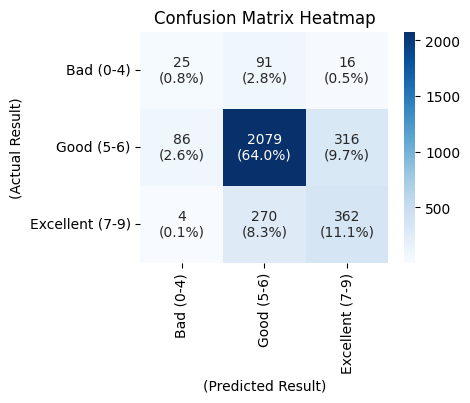

======================== Classification Report ========================
                 precision    recall  f1-score   support

      Bad (0-4)       0.22      0.19      0.20       132
     Good (5-6)       0.85      0.84      0.84      2481
Excellent (7-9)       0.52      0.57      0.54       636

       accuracy                           0.76      3249
      macro avg       0.53      0.53      0.53      3249
   weighted avg       0.76      0.76      0.76      3249

============================ Accuracy ================================
Overall Accuracy: 0.7590027700831025


In [60]:
# =========================================================================== #
# ==================== Fit and Evaluating the Model ========================= #
# =========================================================================== #
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.5, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42) # ensure to use the random_state, otherwise predict result changes overtime
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

# =========================================================================== #
# ========== Plot Confusion Matrix Heatmap & Classification Report ========== #
# =========================================================================== #
def plot_confusion_matrix_and_report(y_test, y_pred):
  conf_mtrx = metrics.confusion_matrix(y_test, y_pred, labels=labels)
  sum = conf_mtrx.sum()
  annot = []
  for i in range(conf_mtrx.shape[0]):
    row = []
    for j in range(conf_mtrx.shape[1]):
      count = conf_mtrx[i][j]
      percent = count / sum * 100
      row.append(f"{count}\n({percent:.1f}%)")
    annot.append(row)
  annot = np.array(annot)
  plt.figure(figsize=(4,3))
  sns.heatmap(
      conf_mtrx,
      annot=annot,
      fmt='s',
      cmap='Blues',
      xticklabels=labels,
      yticklabels=labels,
  )
  plt.title('Confusion Matrix Heatmap')
  plt.xlabel('(Predicted Result)')
  plt.ylabel('(Actual Result)')
  plt.show()

  print('======================== Classification Report ========================')
  print(metrics.classification_report(y_test, y_pred, labels = labels, zero_division=0))
  print('============================ Accuracy ================================')
  print('Overall Accuracy:', metrics.accuracy_score(y_test, y_pred))

plot_confusion_matrix_and_report(y_test, y_pred)

## Task 2c: Visualize Model and Interpret Results
- Overall Assessment on Accuracy:
  - Without specifying any parameters for the classifier, the overall accuracy is 75.9%.
- Assessment on Classification Report (Precision, Recall and F1-Score)
  - The model performs excellent in predicting the "Good" class
  - The model performs moderately in predicting the "Excellent" class
  - The model performs poorly in predicting the "Bad" class
- Assessment on Confusion Matrix Heat Map
  - Most of the "Bad" class was incorrectly predicted as the "Good" class.
  - Nearly half of the "Excellent" class was incorrectly predicted as "Good".
- Does this model make sense?
  - It does, but the prediction accuracy only reaches 75.9%. All results indicate that the dataset is imbalanced, with the "Good" class dominating, and too few samples in the "Bad" class, leading to low prediction accuracy.
- Are there any leaves that are very small?
  - 61.9% of the leaves have fewer than 10 samples, even though there are over 6000 samples in total. The smallest leaf contains only one sample, which is not ideal and suggests potential overfitting.
- Is this an interpretable number of levels?
  - Without any pruning, the tree is extremely deep with 21 depths. This makes it hard to read and interpret for users.

In [31]:
# =========================================================================== #
# ======================= Visualizing the Model ============================= #
# =========================================================================== #
def visualize_model(model):
  print('======================== Visualizing the Model ========================')
  dot_data = StringIO()
  export_graphviz(model, out_file=dot_data,
                  filled=True, rounded=True,
                  special_characters=True,
                  feature_names=X.columns.tolist(),
                  # class_names=dt_clf.classes_, # it will determine the class order defaults to alphabetical
                  class_names=labels) # pass the desired order
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  # graph.write_png('wine.png')
  img = Image(graph.create_png())
  display(img)

visualize_model(dt_clf)

======================== Visualizing the Model ========================


In [61]:
# =========================================================================== #
# ======================= Model Interpretation ============================== #
# =========================================================================== #
def model_interpretation(model):
  print("=============== Model Analysis and Interpretation =====================")
  # Get tree structure information
  n_nodes = model.tree_.node_count
  n_leaves = model.tree_.n_leaves
  max_depth = model.tree_.max_depth
  print(f"Total nodes in tree: {n_nodes}")
  print(f"Number of leaves: {n_leaves}")
  print(f"Maximum depth: {max_depth}")

  # Check leaf sizes
  leaf_samples = model.tree_.n_node_samples[-n_leaves:]
  print(f"\nSmallest leaf: {min(leaf_samples)} samples")
  print(f"Largest leaf: {max(leaf_samples)} samples")
  print(f"Average leaf: {np.mean(leaf_samples)} samples")

  small_leaves = np.sum(leaf_samples < 10)
  print(f"Leaves with < 10 samples: {small_leaves/n_leaves*100:.1f}% ({small_leaves}/{n_leaves})")

  # Feature importance
  feature_importance = pd.DataFrame({
      'feature': X.columns,
      'importance': model.feature_importances_
  }).sort_values('importance', ascending=False)

  print(f"\nTop 5 most important features:")
  for i, row in feature_importance.head(5).iterrows():
      print(f"{ row['feature']:<20}: {row['importance']:.3f}")


model_interpretation(dt_clf)

=============== Model Analysis and Interpretation =====================
Total nodes in tree: 965
Number of leaves: 483
Maximum depth: 21

Smallest leaf: 1 samples
Largest leaf: 1065 samples
Average leaf: 25.538302277432713 samples
Leaves with < 10 samples: 61.9% (299/483)

Top 5 most important features:
alcohol             : 0.204
free_sulfur_dioxide : 0.114
residual_sugar      : 0.096
total_sulfur_dioxide: 0.083
sulphates           : 0.081


## Task 2d: Entropy Criteria
- Change Made Compared to the Original Model:
  - Used **entropy** as the criterion instead of the default **gini** criterion for this model.
- Assessments and Comparation on Results:
  - Accuracy:
    - The accuracy improved from 75.9% to 78.3%, which is a positive change.
  - Classification Report (Precision, Recall and F1-Score)
    - Precision, recall and f1-score have all improved, but the differences are very small.
  - Confusion Matrix Heat Map
    - The number of correct predictions across all three classes has increased, but the improvement is very small.
  - Model Interpretation:
    - The proportion of small leaves (fewer than 10 samples) decreased from 61.9% to 56.2%, which is better for model readability and interpretation.
    - But this percentage is still relatively high considering the number of samples is over 6000.


>>> Visualization for Entropy Criteria:


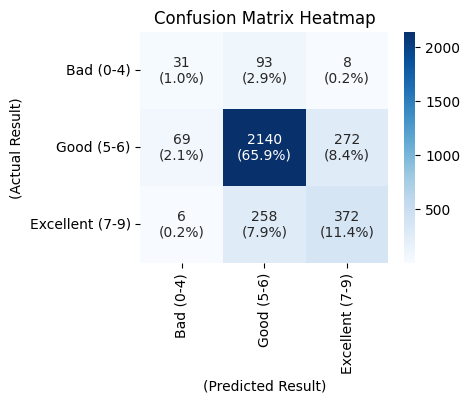

======================== Classification Report ========================
                 precision    recall  f1-score   support

      Bad (0-4)       0.29      0.23      0.26       132
     Good (5-6)       0.86      0.86      0.86      2481
Excellent (7-9)       0.57      0.58      0.58       636

       accuracy                           0.78      3249
      macro avg       0.57      0.56      0.57      3249
   weighted avg       0.78      0.78      0.78      3249

============================ Accuracy ================================
Overall Accuracy: 0.7827023699599877

=============== Model Analysis and Interpretation =====================
Total nodes in tree: 899
Number of leaves: 450
Maximum depth: 20

Smallest leaf: 1 samples
Largest leaf: 609 samples
Average leaf: 25.502222222222223 samples
Leaves with < 10 samples: 56.2% (253/450)

Top 5 most important features:
alcohol             : 0.173
volatile_acidity    : 0.099
sulphates           : 0.095
citric_acid         : 0.091
d

In [68]:
# Fit model with entropy criteria
dt_clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_clf_entropy = dt_clf_entropy.fit(X_train, y_train)
y_pred_entropy = dt_clf_entropy.predict(X_test)

# Evaluate model with confusion matrix and classification report
print('>>> Visualization for Entropy Criteria:')
plot_confusion_matrix_and_report(y_test, y_pred_entropy)
print()
model_interpretation(dt_clf_entropy)


# Task 3: Parameter Experiments
Experiment to see how max_depth, min_values_split, or min_values_leaf impacts the model
## Task 3a: Parameter Choice and Hypothesis
- Parameter Choice and Reason:
  - I chose max_depth for experiments as it controls how deep the tree can grow, which directly affects complexity and interpretations of this model.
- Hypothesis:
  - Small max_depth: More likely to cause underfitting as the model becomes too simple for accurate predictions.
  - Large max_depth: More likely to cause overfitting, similiar to the original model, where the model memorizes data rather than generalizing.
  - Moderate max_depth: Expected to produce a balanced performance, avoiding both underfitting and overfitting.
## Task 3b: Parameter Value Choice and Justification
- Value choice for max_depth:
  - Upper bound: 11
  - Lower bound: 3
  - Middle bound: 7
- Explanation:
  - Based on EDA research, a common heuristic for deciding the upper bound is to use the number of features, which is 11.
  - Considering the size of this dataset, the lower bound should be greater than 3 by intuition.
  - The middle value 7 is chosoen as a median between the upper and lower bounds.

## Task 3c & 3d: Train, Test and Describe Performance
- Metrics used to describe the performance, see comparasion in the result.
  - smallest leaf
  - accuracy
  - precision
  - recall
  - f1_score


In [63]:
depths = [3, 7, 11]
results = []
dt_models = []
for depth in depths:
  # Train
  dt_clf_depth = DecisionTreeClassifier(
      criterion='entropy',
      max_depth=depth,
      random_state=42
  )
  dt_clf_depth = dt_clf_depth.fit(X_train, y_train)
  dt_models.append({
      'depth': depth,
      'model': dt_clf_depth
  })

  # Predict
  y_predict_depth = dt_clf_depth.predict(X_test)

  # Evaluate
  accuracy = metrics.accuracy_score(
      y_test,
      y_predict_depth
  )
  precison = metrics.precision_score(
      y_test,
      y_predict_depth,
      average='weighted',
      zero_division=0
  )
  recall = metrics.recall_score(
      y_test,
      y_predict_depth,
      average='weighted',
      zero_division=0
  )
  f1 = metrics.f1_score(
      y_test,
      y_predict_depth,
      average='weighted',
      zero_division=0
  )

  n_leaves = dt_clf_depth.tree_.n_leaves
  leaf_samples = dt_clf_depth.tree_.n_node_samples[-n_leaves:]
  # Store results
  results.append({
      'max_depth': depth,
      'smallest_leaf': min(leaf_samples),
      'accuracy': accuracy,
      'precision': precison,
      'recall': recall,
      'f1_score': f1,
  })

# Compile results into Dataframe
results_df = pd.DataFrame(results)
results_df.set_index('max_depth', inplace=True)
print(results_df.round(2))


           smallest_leaf  accuracy  precision  recall  f1_score
max_depth                                                      
3                    114      0.77       0.72    0.77      0.74
7                      1      0.78       0.75    0.78      0.76
11                     1      0.77       0.76    0.77      0.77


## Task 3e: Visualizing and Interpreting Results
- Interpretation on Selected Matrics:
  - Accuracy & Recall:
    - Weighted recall and accuracy do not have too much difference in three different depths.
    - Macro recall does improve with depth, which matters if care about minority class like "Bad" class.
  - Precision & F1_score:
    - The deeper the depth, the higher the score will be.
  - Smallest leaf:
    - Shallow trees do produce larger leaves, which reduces the risk of overfitting.
    - Performance of shallow trees is not better overall. If the goal is to capture dominate class like "Good" class, it does better. But for minority classes like "Bad" and "Excellent", deeper trees do better.

- Interpretation on Confusion Matrix:
  - "Good" Class Predication:
    - max_depth=3 has the best performance in predicting this class. The deeper the depth, the worse this prediction will be.
  - "Bad" Class Prediction:
    - All three models perform terribly on predicting this class. They all misclassify "Bad" class to "Good" class.
    - Within three models, max_depth=11 has the best performance in predicting this class. The deeper the depth, the better this prediction will be.
  - "Excellent" Class Prediction:
    - All three models perform not quite good on predicting this class. They are more likely to predict "Excellent" class to "Good" class.
    - Within three models, max_depth=11 has the best performance in predicting this class. The deeper the depth, the better this prediction will be.
  
- Indications of the Results:
  - The dataset is highly imbalanced, with "Good" data dominated, which drives the performance of predicting "Bad" and "Excellent".
  - Choose different metrics to measure the performance of different depth. As the prediction of "Good" class is better using shallower tree, while the prediction of other two classes are better using deeper tree.
  - max_depth may not most impact the performance of the model, still need to experiment other parameters such as min_values_split or min_values_leaf to see how to make improvement for this model.

******************** Plotting confusion matrix and classification report: max_depth=3 ********************


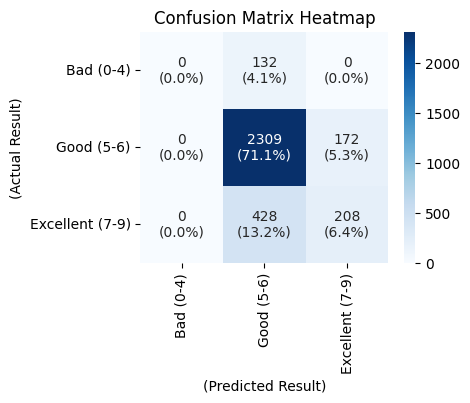

======================== Classification Report ========================
                 precision    recall  f1-score   support

      Bad (0-4)       0.00      0.00      0.00       132
     Good (5-6)       0.80      0.93      0.86      2481
Excellent (7-9)       0.55      0.33      0.41       636

       accuracy                           0.77      3249
      macro avg       0.45      0.42      0.42      3249
   weighted avg       0.72      0.77      0.74      3249

============================ Accuracy ================================
Overall Accuracy: 0.7746999076638966



******************** Plotting confusion matrix and classification report: max_depth=7 ********************


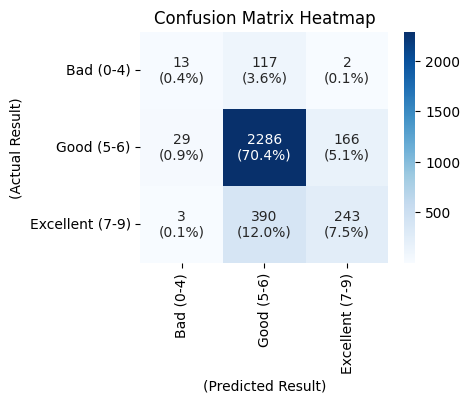

======================== Classification Report ========================
                 precision    recall  f1-score   support

      Bad (0-4)       0.29      0.10      0.15       132
     Good (5-6)       0.82      0.92      0.87      2481
Excellent (7-9)       0.59      0.38      0.46       636

       accuracy                           0.78      3249
      macro avg       0.57      0.47      0.49      3249
   weighted avg       0.75      0.78      0.76      3249

============================ Accuracy ================================
Overall Accuracy: 0.7823945829485995



******************** Plotting confusion matrix and classification report: max_depth=11 ********************


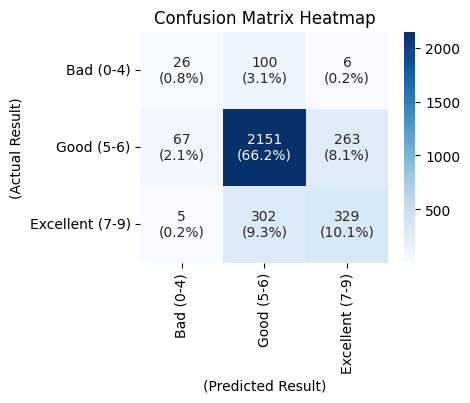

======================== Classification Report ========================
                 precision    recall  f1-score   support

      Bad (0-4)       0.27      0.20      0.23       132
     Good (5-6)       0.84      0.87      0.85      2481
Excellent (7-9)       0.55      0.52      0.53       636

       accuracy                           0.77      3249
      macro avg       0.55      0.53      0.54      3249
   weighted avg       0.76      0.77      0.77      3249

============================ Accuracy ================================
Overall Accuracy: 0.7713142505386272





In [70]:
for dt_model in dt_models:
  print(f'******************** Plotting confusion matrix and classification report: max_depth={dt_model['depth']} ********************')
  # visualize_model(dt_model['model'])
  plot_confusion_matrix_and_report(y_test, dt_model['model'].predict(X_test))
  print('\n\n')